In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

from config import weather_api_key

from citipy import citipy

output_data = "../data/cities.csv"

lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
lat_lngs = []
cities = []
country_code = []

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    if city not in cities:
        cities.append(city)
        country_code.append(country)
        
        
print(len(cities))
print(cities[0:30])

626
['chuy', 'new norfolk', 'hithadhoo', 'lasa', 'dillon', 'saldanha', 'albany', 'punta arenas', 'mataura', 'port augusta', 'port-gentil', 'santa maria', 'atuona', 'upernavik', 'kapaa', 'poum', 'tanete', 'houma', 'georgetown', 'wuhu', 'barrow', 'cherskiy', 'rikitea', 'saint-philippe', 'hualmay', 'cabo san lucas', 'kutum', 'cidreira', 'naron', 'hami']


In [3]:
print(len(cities))
print(cities[0:30],country_code[0:30])

626
['chuy', 'new norfolk', 'hithadhoo', 'lasa', 'dillon', 'saldanha', 'albany', 'punta arenas', 'mataura', 'port augusta', 'port-gentil', 'santa maria', 'atuona', 'upernavik', 'kapaa', 'poum', 'tanete', 'houma', 'georgetown', 'wuhu', 'barrow', 'cherskiy', 'rikitea', 'saint-philippe', 'hualmay', 'cabo san lucas', 'kutum', 'cidreira', 'naron', 'hami'] ['uy', 'au', 'mv', 'cn', 'us', 'za', 'au', 'cl', 'pf', 'au', 'ga', 'cv', 'pf', 'gl', 'us', 'nc', 'id', 'us', 'sh', 'cn', 'us', 'ru', 'pf', 're', 'pe', 'mx', 'sd', 'br', 'es', 'cn']


In [4]:
units = "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"

query_url = f"{url}appid={weather_api_key}&units={units}&q="
city_lat = []
city_lng = []
weather = []
humidity = []
cloudiness = []
wind_speed = []
city_list = []
country_list = []




for x in range(len(cities)):
    city = cities[x]
    response = requests.get(f"{query_url}{city},{country_code[x]}").json()
    
    if city not in city_list:
        
        try:
            city_lat.append(response["coord"]["lat"])
            city_lng.append(response["coord"]["lon"])
            weather.append(response["main"]["temp"])
            humidity.append(response["main"]["humidity"])
            cloudiness.append(response["clouds"]["all"])
            wind_speed.append(response["wind"]["speed"])
            city_list.append(cities[x])
            country_list.append(country_code[x])
        
            print(f"Retrieving info for {x+1} of {len(cities)} cities. | {city}")
    
        except KeyError:
            print(f"No matching city found.  Skipped. | {city}")
    else:
        print(f"Redundant city found. Skipped. | {city}")

    time.sleep(1)


Retrieving info for 1 of 626 cities. | chuy
Retrieving info for 2 of 626 cities. | new norfolk
Retrieving info for 3 of 626 cities. | hithadhoo
No matching city found.  Skipped. | lasa
Retrieving info for 5 of 626 cities. | dillon
Retrieving info for 6 of 626 cities. | saldanha
Retrieving info for 7 of 626 cities. | albany
Retrieving info for 8 of 626 cities. | punta arenas
No matching city found.  Skipped. | mataura
Retrieving info for 10 of 626 cities. | port augusta
Retrieving info for 11 of 626 cities. | port-gentil
Retrieving info for 12 of 626 cities. | santa maria
Retrieving info for 13 of 626 cities. | atuona
Retrieving info for 14 of 626 cities. | upernavik
Retrieving info for 15 of 626 cities. | kapaa
Retrieving info for 16 of 626 cities. | poum
Retrieving info for 17 of 626 cities. | tanete
Retrieving info for 18 of 626 cities. | houma
Retrieving info for 19 of 626 cities. | georgetown
Retrieving info for 20 of 626 cities. | wuhu
Retrieving info for 21 of 626 cities. | barro

Retrieving info for 167 of 626 cities. | serenje
Retrieving info for 168 of 626 cities. | grand baie
Retrieving info for 169 of 626 cities. | koster
Retrieving info for 170 of 626 cities. | pisco
Retrieving info for 171 of 626 cities. | alindao
Retrieving info for 172 of 626 cities. | handan
Retrieving info for 173 of 626 cities. | kahului
Retrieving info for 174 of 626 cities. | garowe
No matching city found.  Skipped. | abu samrah
No matching city found.  Skipped. | nizhneyansk
Retrieving info for 177 of 626 cities. | lompoc
No matching city found.  Skipped. | chagda
Retrieving info for 179 of 626 cities. | ayame
Retrieving info for 180 of 626 cities. | saint-francois
Retrieving info for 181 of 626 cities. | odessa
Retrieving info for 182 of 626 cities. | esperance
Retrieving info for 183 of 626 cities. | tuktoyaktuk
Retrieving info for 184 of 626 cities. | havre-saint-pierre
Retrieving info for 185 of 626 cities. | sambava
Retrieving info for 186 of 626 cities. | tuatapere
Retrievin

Retrieving info for 332 of 626 cities. | cap malheureux
No matching city found.  Skipped. | tsihombe
Retrieving info for 334 of 626 cities. | karema
Retrieving info for 335 of 626 cities. | tiznit
No matching city found.  Skipped. | louisbourg
Retrieving info for 337 of 626 cities. | bandarbeyla
Retrieving info for 338 of 626 cities. | grindavik
Retrieving info for 339 of 626 cities. | coos bay
Retrieving info for 340 of 626 cities. | ovre ardal
Retrieving info for 341 of 626 cities. | peterhead
Retrieving info for 342 of 626 cities. | charters towers
Retrieving info for 343 of 626 cities. | los algarrobos
Retrieving info for 344 of 626 cities. | turukhansk
Retrieving info for 345 of 626 cities. | sinnamary
Retrieving info for 346 of 626 cities. | san quintin
Retrieving info for 347 of 626 cities. | saiha
No matching city found.  Skipped. | burica
Retrieving info for 349 of 626 cities. | buraydah
Retrieving info for 350 of 626 cities. | porto novo
Retrieving info for 351 of 626 cities.

Retrieving info for 497 of 626 cities. | wasilla
Retrieving info for 498 of 626 cities. | tucumcari
No matching city found.  Skipped. | warqla
Retrieving info for 500 of 626 cities. | kamsack
No matching city found.  Skipped. | tumannyy
Retrieving info for 502 of 626 cities. | bulgan
Retrieving info for 503 of 626 cities. | bembereke
Retrieving info for 504 of 626 cities. | bayshore gardens
Retrieving info for 505 of 626 cities. | tingo maria
Retrieving info for 506 of 626 cities. | sayat
No matching city found.  Skipped. | westpunt
No matching city found.  Skipped. | aakirkeby
Retrieving info for 509 of 626 cities. | zottegem
Retrieving info for 510 of 626 cities. | college
Retrieving info for 511 of 626 cities. | kitimat
Retrieving info for 512 of 626 cities. | hovd
Retrieving info for 513 of 626 cities. | sitka
Retrieving info for 514 of 626 cities. | wajima
Retrieving info for 515 of 626 cities. | miandrivazo
Retrieving info for 516 of 626 cities. | roma
No matching city found.  Sk

In [5]:
print(len(city_list), len(city_lat), len(city_lng), len(weather), len(humidity), len(cloudiness), len(wind_speed))

550 550 550 550 550 550 550


In [6]:
weather_df = pd.DataFrame({"City": city_list, 
                           "Country": country_list,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Temperature (F)": weather,
                          "Humidity": humidity,
                          "Cloudiness": cloudiness,
                          "Wind Speed (mph)": wind_speed})

weather_clean_df = weather_df.loc[weather_df["Humidity"] < 100]

weather_df.to_csv(output_data)



weather_df.head()

,City,Country,Lat,Lng,Temperature (F),Humidity,Cloudiness,Wind Speed (mph)
0,chuy,uy,-33.6971,-53.4616,73.26,56,0,12.46
1,new norfolk,au,-42.7826,147.0587,44.80,55,62,1.99
2,hithadhoo,mv,-0.6000,73.0833,80.83,64,0,3.09
3,dillon,us,34.4166,-79.3712,53.87,35,1,19.57
4,saldanha,za,-33.0117,17.9442,69.80,68,0,9.22


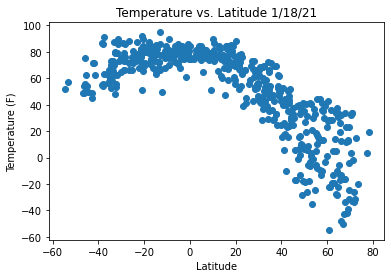

In [78]:
plt.scatter(weather_clean_df["Lat"], weather_clean_df["Temperature (F)"])
plt.title("Temperature vs. Latitude 1/18/21")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("../Images/Temperature_Latitude_1-18-21.png")

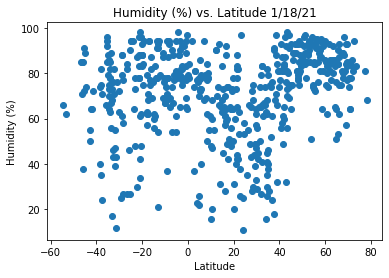

In [82]:
plt.scatter(weather_clean_df["Lat"], weather_clean_df["Humidity"])
plt.title("Humidity (%) vs. Latitude 1/18/21")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("../Images/Humidity_Latitude_1-18-21.png")

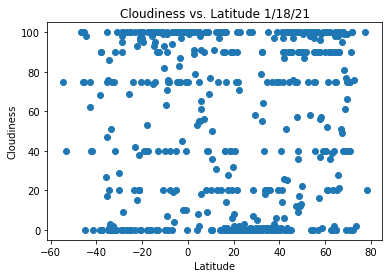

In [80]:
plt.scatter(weather_clean_df["Lat"], weather_clean_df["Cloudiness"])
plt.title("Cloudiness vs. Latitude 1/18/21")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.savefig("../Images/Cloudiness_Latitude_1-18-21.png")

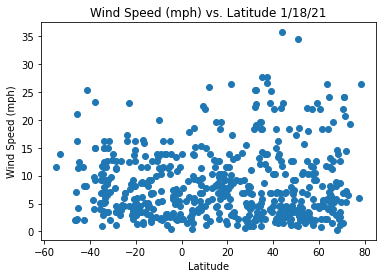

In [81]:
plt.scatter(weather_clean_df["Lat"], weather_clean_df["Wind Speed (mph)"])
plt.title("Wind Speed (mph) vs. Latitude 1/18/21")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("../Images/WindSpeed_Latitude_1-18-21.png")

In [62]:
northern_df = weather_clean_df.loc[weather_clean_df["Lat"] >= 0]

southern_df = weather_clean_df.loc[weather_clean_df["Lat"] < 0]

def regress(x,y):
    global slope, intercept, rvalue, pvalue, stderr, regress_values, line_eq
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
    regress_values = x * slope + intercept
    plt.plot(x, regress_values, "-", color="blue")
    line_eq = "y= " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

The r-value is: -0.8409940428530249


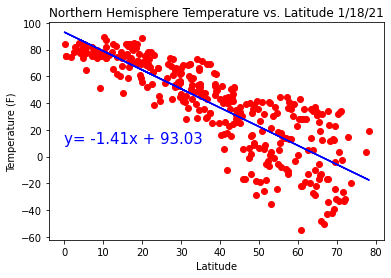

In [90]:
x = northern_df["Lat"]
y = northern_df["Temperature (F)"]


plt.scatter(x, y, c="red")
plt.title("Northern Hemisphere Temperature vs. Latitude 1/18/21")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")


regress(x,y)
plt.annotate(line_eq, (0, 10), fontsize=15, color="blue")

plt.savefig("../Images/Nothern_Hemisphere_Temperature_Latitude_1-18-21.png")
print(f"The r-value is: {rvalue}")

The r-value is: 0.5348884788257173


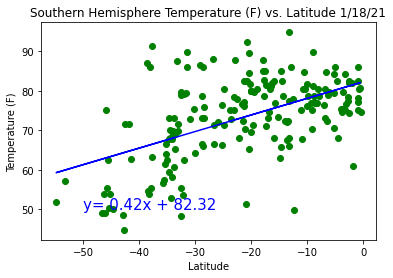

In [65]:
x = southern_df["Lat"]
y = southern_df["Temperature (F)"]


plt.scatter(x, y, c="green")
plt.title("Southern Hemisphere Temperature (F) vs. Latitude 1/18/21")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

regress(x, y)
plt.annotate(line_eq, (-50, 50), fontsize=15, color="blue")
plt.savefig("../Images/Southern_Hemisphere_Temperature_Latitude_1-18-21.png")
print(f"The r-value is: {rvalue}")

The r-value is: 0.4176983795912178


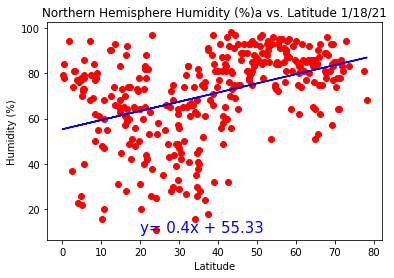

In [91]:
x = northern_df["Lat"]
y = northern_df["Humidity"]


plt.scatter(x, y, c="red")
plt.title("Northern Hemisphere Humidity (%)a vs. Latitude 1/18/21")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


regress(x,y)
plt.annotate(line_eq, (20, 10), fontsize=15, color="blue")

plt.savefig("../Images/Nothern_Hemisphere_Humidity_Latitude_1-18-21.png")
print(f"The r-value is: {rvalue}")

The r-value is: 0.5348884788257173


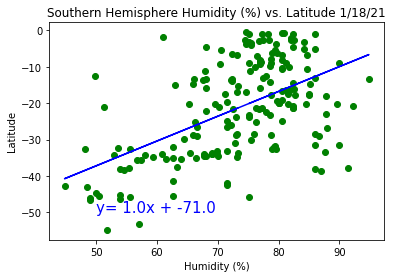

In [47]:
x = southern_df["Temperature (F)"]
y = southern_df["Lat"]

plt.scatter(x, y, c="green")
plt.title("Southern Hemisphere Humidity (%) vs. Latitude 1/18/21")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")

regress(x, y)
plt.annotate(line_eq, (50, -50), fontsize=15, color="blue")
plt.savefig("../Images/Southern_Hemisphere_Humidity_Latitude_1-18-21.png")
print(f"The r-value is: {rvalue}")

The r-value is: 0.1474386611130609


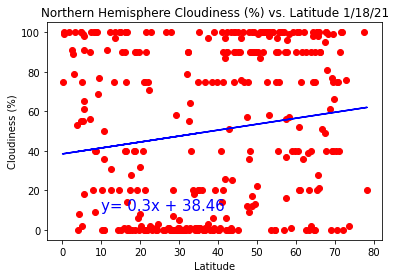

In [88]:
x = northern_df["Lat"]
y = northern_df["Cloudiness"]


plt.scatter(x, y, c="red")
plt.title("Northern Hemisphere Cloudiness (%) vs. Latitude 1/18/21")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


regress(x,y)
plt.annotate(line_eq, (10, 10), fontsize=15, color="blue")
plt.savefig("../Images/Nothern_Hemisphere_Cloudiness_Latitude_1-18-21.png")
print(f"The r-value is: {rvalue}")

The r-value is: 0.23336307046932417


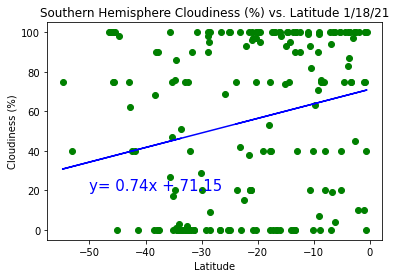

In [70]:
x = southern_df["Lat"]
y = southern_df["Cloudiness"]


plt.scatter(x, y, c="green")
plt.title("Southern Hemisphere Cloudiness (%) vs. Latitude 1/18/21")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


regress(x, y)
plt.annotate(line_eq, (-50, 20), fontsize=15, color="blue")
plt.savefig("../Images/Southern_Hemisphere_Cloudiness_Latitude_1-18-21.png")
print(f"The r-value is: {rvalue}")

The r-value is: 0.02746808026090916


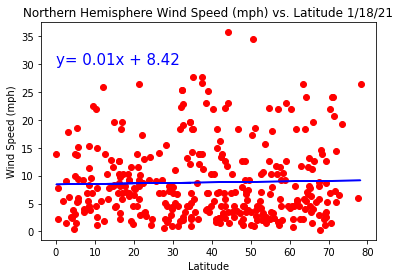

In [89]:
x = northern_df["Lat"]
y = northern_df["Wind Speed (mph)"]


plt.scatter(x, y, c="red")
plt.title("Northern Hemisphere Wind Speed (mph) vs. Latitude 1/18/21")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")


regress(x,y)
plt.annotate(line_eq, (0, 30), fontsize=15, color="blue")
plt.savefig("../Images/Nothern_Hemisphere_WindSpeed_Latitude_1-18-21.png")
print(f"The r-value is: {rvalue}")

The r-value is: -0.1971272670827878


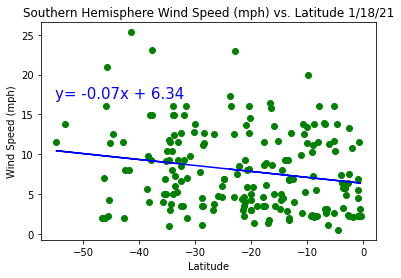

In [77]:
x = southern_df["Lat"]
y = southern_df["Wind Speed (mph)"]


plt.scatter(x, y, c="green")
plt.title("Southern Hemisphere Wind Speed (mph) vs. Latitude 1/18/21")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")


regress(x, y)
plt.annotate(line_eq, (-55, 17), fontsize=15, color="blue")
plt.savefig("../Images/Southern_Hemisphere_WindSpeed_Latitude_1-18-21.png")
print(f"The r-value is: {rvalue}")